# Bayes Theorem

This chapter has been evolving into my favorite of the whole course. In truth, were it not that hypothesis tests and confidence intervals were still being widely used we could have used this topic as the foundation for the course. A graduate program in statistics would feature an entire course dedicated to this topic.

So what is Bayes Theorem. To get there we need to start with the conditional probability that we last saw in Chapter 7 in our discussion of multivariate distributions and dependence. 

Recall the definition:  

$$ P(A | B) = \mbox{The probability that event A happens given that we have observed event B} $$

Recall that this can be computed from 

$$ P(A, B) = \mbox{The probability that both event A and event B happen} $$

and the marginal probability 

$$ P(B) = \mbox{The probability that event B happens} $$

We get:

$$ P(A|B) = \frac{P(A, B)}{ P(B) } $$

i.e. the probability that $A$ happens given that $B$ has been observed is found from the ratio of how likely A is to occur in the set of all outcomes where $B$ has occured.

The observation that leads us to Bayes's Theorem is that the denominator of this ratio $P(A, B)$ is symmetric in $A$ and $B$. Hence it appears when we compute the conditional probability in the other direction:  

$$ P(B|A) = \frac{P(A, B)}{ P(A) } $$

This implies first that we can compute one conditional probability by finding the opposite one:

$$ P(A|B) = \frac{P(A) P(B | A)}{P(B)} $$

which immediately lets us do things like:

## Example

Suppose that we draw two cards and show them to a friend. The friend tells us that at least one of them is a face card. How likely is it that one of the cards is the Queen of Hearts?  We have

First the probability that drawing two cards one of them is the QH is computed by adding together the probabilities that the first card or the second card is the QH - it helps that there is only one QH.
$$ P(QH) = \frac{1}{52} \cdot \frac{51}{51} + \frac{51}{52} \cdot \frac{1}{51} = \frac{2}{52} $$

The probability that drawing two cards at least one of them is a Face Card is computed by adding together the probabilities that the first card is a FC but the second is not; that the second is a FC but the first is not; and finally that both of them are FC:
$$ P(FC) = \frac{12}{52} \frac{51 - 11}{52} + \frac{51-12}{52} \frac{12}{51} + \frac{12}{52} \frac{11}{51} $$






In [2]:
PFC = 12/52 * (51-11)/51 + (51-12)/52* 12/51 + 12/52 * 11/51
PFC

[1] 0.4072398

Finally we want the probability that at least one of the cards is a face card given that one of them is QH, but this is easily seen to be 1.

Therefore we have:

In [3]:
PQH_given_FC = 2/52 / PFC
PQH_given_FC

[1] 0.09444444

## Bayes Theorem

So that is interesting, but that is only part of the story. The situation Bayes wanted to undeerstand is the following:  Suppose that we have some event we are trying to understand $B$ and a set of alternative events $B_2$ and $B_3$ such that $P(B + B_2 + B_3) = 1$ i.e. all three together are the complete space.

We make some observation $D$ via an experiment or otherwise by gaining new information about the likliehood of $B$ and its complements. Our question is then, can we update how likely we think $B$ and its complements are?

Bayes Theorem says that we can provided we can understand how likely the observation $D$ was given each of the events $B$ and its complements.

$$ P(B |D) = \frac{P(B) P(D|B)}{P(D)} $$

- $P(B)$ is called our *prior estimate* it is built out of assumptions we are making or other knowledge we might have about the likliehood of $B$.
- $P(B|D)$ is called the *posterior estimate* it represents the update we make to our assumptions in the prior estimate based on the observation we have made.
- $P(D)$ is the total likliehood of observation $D$ over all possible outcomes
- $P(D|B)$ is the likliehood of observation $D$ in the case when event $B$ happens.

Let's use some examples to explore:

### Example - Monty Hall

The classic example is the Monty Hall Problem. You are on a game show and are confronted with three doors. Behind one of the doors is a new car, and behind the other two doors are goats. The game works in the following way:  You choose one of the doors. Then Monty opens another door revealing a goat behind it. He then asks you:  Do you want to change your guess?

The question is what should you do?

We will make a small table showing the computation. We first need to set our hypothesis for the possible events. In this case we can say that the contestant chooses door A, Monty opens door B. The car is behind A, B, or C. Our initial guess, because we have no knowledge otherwise is that the car is equally likly to be behind each door so a probability of 1/3. The observation $D$ is that there is a goat behind door $B$.

The likliehod $P(D | H)$ is then found by in the case that the car is actually behind door A there is a 1/2 chance Monty will open door B. However given that the contestant has choosen door A, if the car is actually behind door C then Monty must open door B. 

The $P(D)$ is found by summing up the 4th column (which I remember by recognizing it is the numerator of Bayes ratio). In this case we get 1/3 + 1/6 = 1/2

| H | Prior P(H) | Likliehood P(D given H) | P(H) P(D given H) | Posterior P(H given D) |
| -- | ---- | ---- | ---- | ---- |
| A | 1/3 | 1/2 | 1/6 | 1/3 |
| B | 1/3 | 0   | 0   | 0  |
| C | 1/3 | 1   | 1/3 | 2/3 |

The final check that is that the last column should sum to 1 if we have made no arithmetic mistakes. 

In thise case if the contestant switches their guess they will double their odds of winning the car.



## Example - The Locomotive Problem

A train company has $N$ locomotives and numbers them 1, 2, 3, ... N.  We are at the train station and observe locomotive 65 go by. What can we say about $N$?

## Example - Unfair Coin

Unfair coins happen. You can buy them at a magic or toy shop if you are interested. 

We suspect we are dealing with an unfair coin. We flip it once and we get a heads. What can we say about the probability $p$ that a flip of the coin will give us heads?

This is our first example of Bayes Theorem with a continuous hypothesis. We will ask what is the probability density function for the probability $p$ that the coin gives a heads. You might recall that this is the kind of question that led to the Beta Distribution. 

So each value of $p \in [0, 1]$ is a hypothesis. We need to give a prior estimate of the probability for each p, and because it is a continuous variable we should do this by assigning a PDF to it. 

**NOTE**  Before we go on, you could solve this problem by setting some discrete values for $p$ and turning it into a problem like the discrete examples above. 

A sensible prior, not knowing anything else about the coin would be a flat prior i.e. that $p$ is a uniformly distributed variable on the interval $[0,1]$. So we have:  $f(x) = 1$ for our prior.

Given a value of $p=x$, the likliehood of flipping a heads is x and thus: $P(D | p=x) = x$.  

We then have $ f(x) P(D | p=x) = x$ and the total probability of observing a Heads is found by taking the integral:  

$$ \int_0^1 x dx = \frac12 $$

Finally putting it all together we get our posterior estimate:

$$ f(x|D) = 2 x $$

### More Data

One of the brilliant things about Bayes Theorem is that allows us to continuously update our estimate of the probability of our hypothesis as more data arrives. Suppose we flip the coin again and get another heads:

$$ f(x | HH) = \frac{f(x |H) P(HH | x)}{f(HH)} $$

We have $f(x|H) = 2 x$

The likliehood of a second H given p=x is just x again. We compute the total probability by finding the integral

$$ f(HH) = \int_0^1 2 x^2 dx = \frac{2}{3} $$

and then we have our new posterior:  

$$ f(x | HH) = 3 x^2 $$.

Checking the graphs of our prior and the two posterior sequence we get:


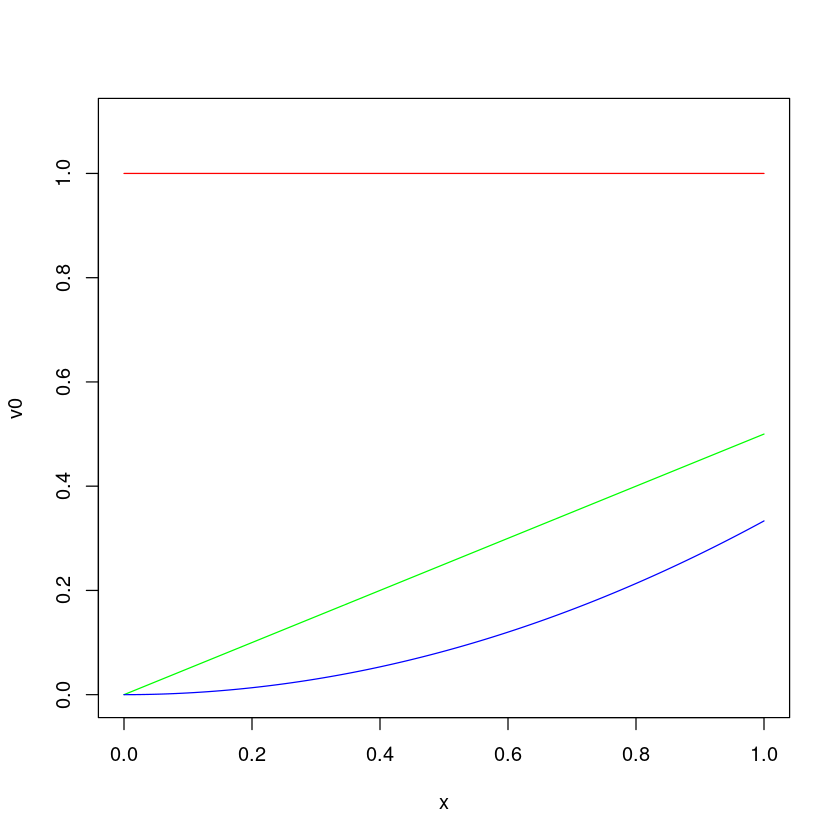

In [19]:
n <- 200
x <- c(0:n)/n
v0 <- dunif(x, 0, 1)
v1 <- x/2
v2 <- x^2/3
plot(x, v0, type='l', col='red', ylim = c(0, 1.1))
lines(x, v1, col='green')
lines(x, v2, col='blue')

### Swamping the Prior

A major concern about using Bayes Theorem is what the effect of the prior is. If the prior estimate is having a strong effect on the result, then mistakes we make in setting it could lead us to the wrong conclusions. In many problems what we will find is that as the amount of data we include, either through refinement of the posterior estimate or just in one go increases, the effect of the prior is lessened - using the different priors does not change the conclusions very much. This is called swamping the prior. 

For example: We are trying to estimate support for candidate A in the local mayoral race. We go to a polling location and we ask people leaving who they voted for. We ask 4 people before finding the first person who said they voted for candidate A. What proportion of the population is supporting candidate $A$?

We start by setting up a discrete set of hypothesis fix some large but not too large $N$: 

$$H_n = \left\{  p = n/N \right\} $$

A flat prior gives every $H_n$ equal probability:  $P(H_n) = 1/N$.  

The likliehood, given $p = n/N$ of having to ask 4 voters before our first success is given by 

$$P(D | H_n) = (1 - n/N)^3 \cdot n/N $$

Multiplying this by the prior gives:

$$ P(H_n) P(D|H_n) = (1-n/N)^3 \cdot n/N^2 $$

and then the total probability of the observation is found by adding all of these up. At this point lets choose an $N$ and do this.



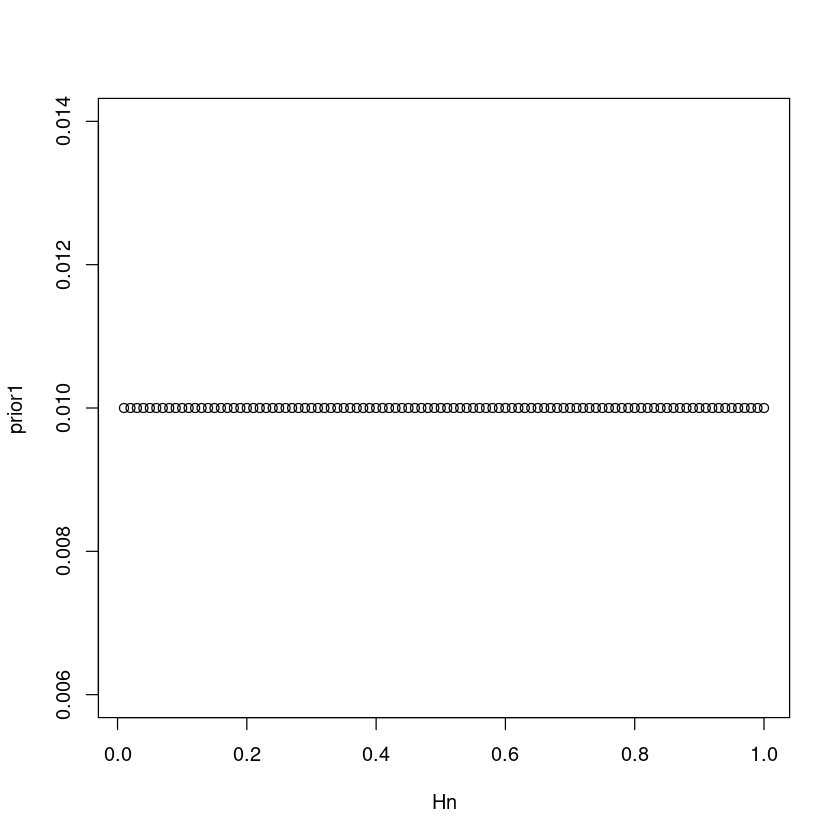

In [33]:
N <- 100
Hn <- c(1:N)/N
prior1 <- ceiling( c(1:N)/N)/N
plot(Hn, prior1)

In [36]:
PD_given_Hn <- (1- Hn)^3 * Hn
PD_given_Hn

[1] 0.00970299 0.01882384 0.02738019 0.03538944 0.04286875 0.04983504
  [7] 0.05630499 0.06229504 0.06782139 0.07290000 0.07754659 0.08177664
 [13] 0.08560539 0.08904784 0.09211875 0.09483264 0.09720379 0.09924624
 [19] 0.10097379 0.10240000 0.10353819 0.10440144 0.10500259 0.10535424
 [25] 0.10546875 0.10535824 0.10503459 0.10450944 0.10379419 0.10290000
 [31] 0.10183779 0.10061824 0.09925179 0.09774864 0.09611875 0.09437184
 [37] 0.09251739 0.09056464 0.08852259 0.08640000 0.08420539 0.08194704
 [43] 0.07963299 0.07727104 0.07486875 0.07243344 0.06997219 0.06749184
 [49] 0.06499899 0.06250000 0.06000099 0.05750784 0.05502619 0.05256144
 [55] 0.05011875 0.04770304 0.04531899 0.04297104 0.04066339 0.03840000
 [61] 0.03618459 0.03402064 0.03191139 0.02985984 0.02786875 0.02594064
 [67] 0.02407779 0.02228224 0.02055579 0.01890000 0.01731619 0.01580544
 [73] 0.01436859 0.01300624 0.01171875 0.01050624 0.00936859 0.00830544
 [79] 0.00731619 0.00640000 0.00555579 0.00478224 0.00407779 0.00344064
 [85] 0.00286875 0.00235984 0.00191139 0.00152064 0.00118459 0.00090000
 [91] 0.00066339 0.00047104 0.00031899 0.00020304 0.00011875 0.00006144
 [97] 0.00002619 0.00000784 0.00000099 0.00000000

In [30]:
PD <- sum(prior1 * PD_given_Hn)
PD

[1] 0.04999167

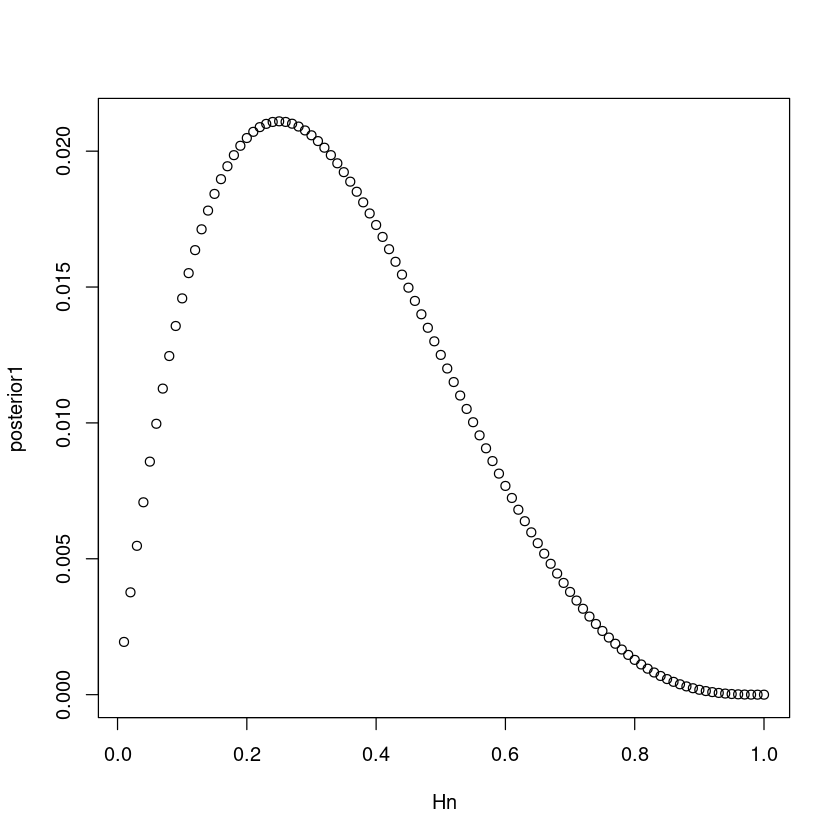

In [32]:
posterior1 <- prior1 * PD_given_Hn / PD
plot(Hn, posterior1)

Whereas maybe we suspect that there is not much support for our candidate. We might take 

$$ P(H_n) = (1 - n/N) / C$$ 

where $C$ is a normalizing constant we will need to compute.

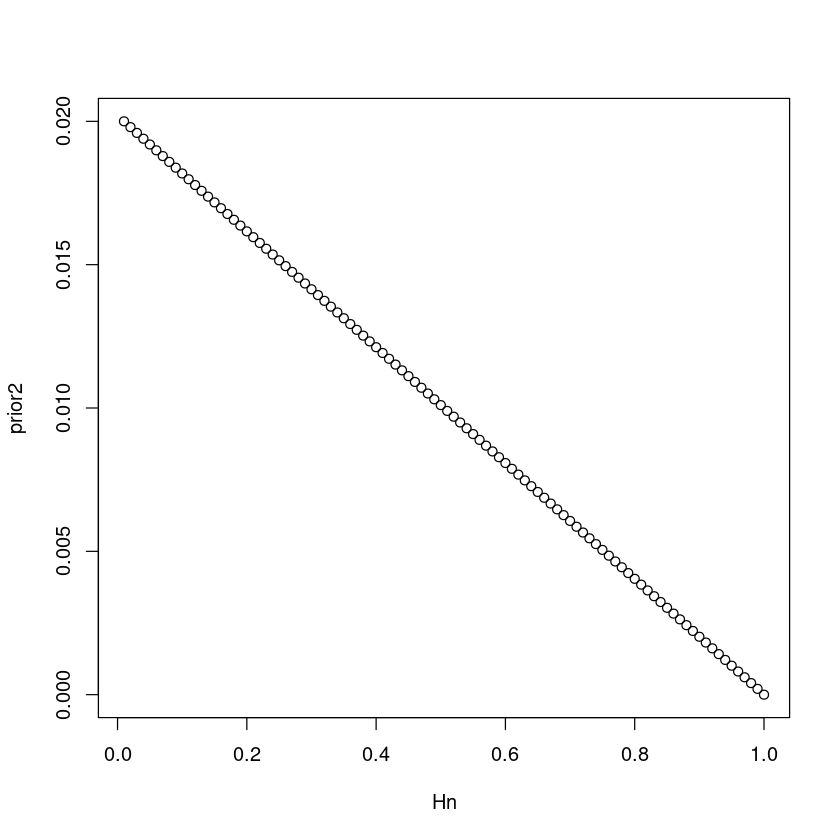

In [45]:
prior2 <- (1 - Hn)
prior2 <- prior2 / sum(prior2)
plot(Hn, prior2)

In [47]:
# check that the prior estimate has total probability 1
sum(prior2)

[1] 1

In [48]:
PD <- sum(prior2 * PD_given_Hn)
PD

[1] 0.06732323

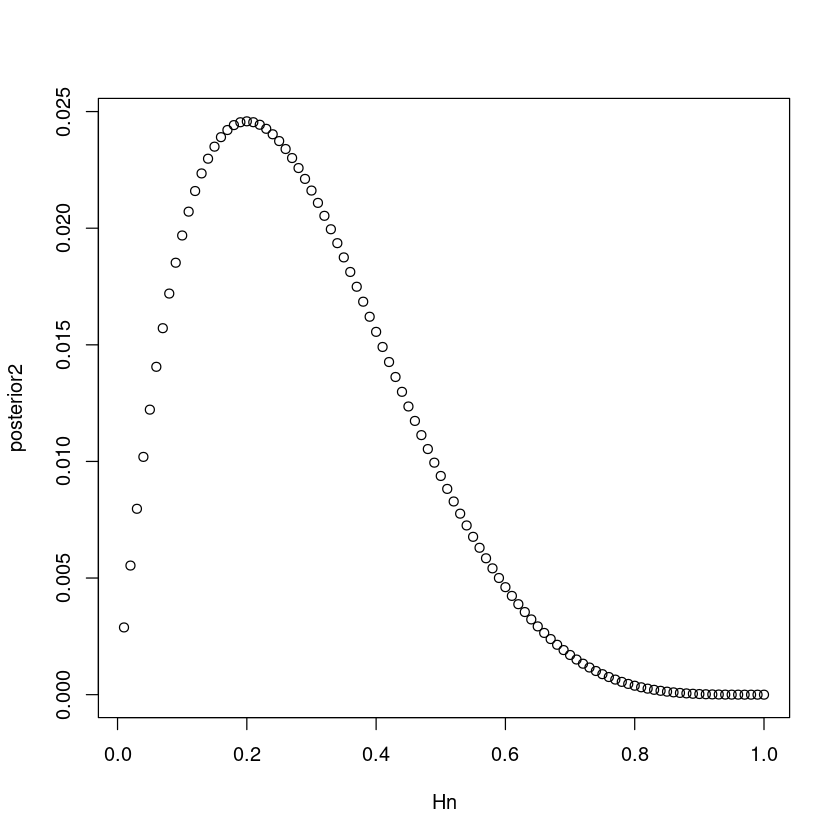

In [49]:
posterior2 = prior2 * PD_given_Hn / PD
plot(Hn, posterior2)

We see that with a sample size of just 4 (essentially the 3 failures and then one success counts as 4 samples from the Bernouli trial) the prior we start with has little effect on the result. 

## Credible Intervals

Let's use the last example we have computed to do something like we did with *confidence intervals*.  If we add up a set of hypothesis we get a range of values where we now have an estimate on how likely it is that the paramter lives. In the example above we note that adding up the probability for the first 51 values of p we get:

In [60]:
sum(posterior2[0:51])

[1] 0.9040618

With probability 90% then we are estimating that $p$ is beetween 0 and 0.51. Note that the first posterior estimate gives a close result though not exactly the same:

In [62]:
sum(posterior1[0:51])

[1] 0.8306803

Suppose we have even more data:  We poll another 3 people before finding a voter who supports A. We can update both of our posteriors again:

In [63]:
PD_given_Hn = (1- Hn)^2 * Hn
PD = sum( posterior1 * PD_given_Hn)
PD

[1] 0.1190675

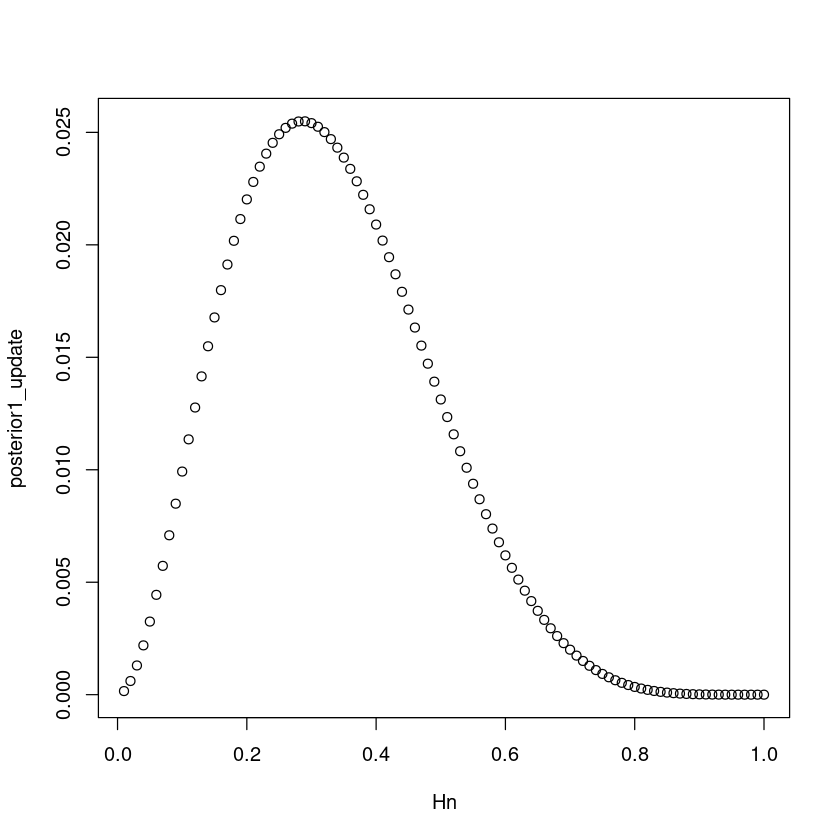

In [64]:
posterior1_update = posterior1 * PD_given_Hn / PD
plot(Hn, posterior1_update)

In [65]:
PD = sum( posterior2 * PD_given_Hn)
PD

[1] 0.1190774

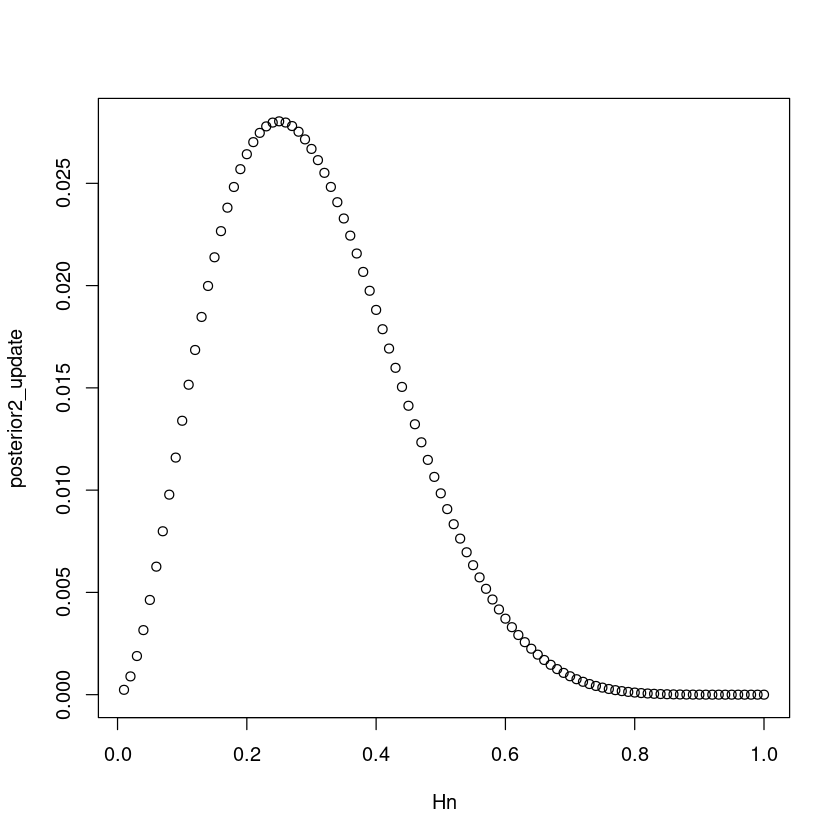

In [66]:
posterior2_update = posterior2 * PD_given_Hn / PD
plot(Hn, posterior2_update)

and again looking for credible intervals we add up the first 49 values:

In [69]:
sum( posterior1_update[1:49]);
sum( posterior2_update[1:49])

[1] 0.8488406

[1] 0.9051687

As we make more observations we expect the updated posteriors to converge and therefore the credible intervals will continue to get closer. The evidence so far is indicating that candidate A has less than 50% support from voters.

## Detecting Fraud

Bayes theorem is frequently used in efforts to detect fraud or determine with an email is legitimate or might be an attach on a company. One example of such an effort is in looking at the results of laboratory tests for THC concentration in commercial marijuana. It appears that some labs have an incentive of some kind to rate samples at above 20%. See the two histograms - one is the resutl of tests from a lab that has been suspended and the other is the result from a trusted laboratory. 

This problem comes from the article: https://jcannabisresearch.biomedcentral.com/articles/10.1186/s42238-021-00064-2 about cannabis testing labs in Washington state. There have been some high profile cases of labs in CA, NV, and CO as well as Canada being fine or suspended for falsifying data or for retailers or producers shopping for labs.

Something suspicious is happening at some labs in Washington state that test for THC concentrations in consumer sold marajuana. The distribution of concentrations appear to be normal except that there is a discontinuity in the distribution at 20% with a higher density of results just above 20% than just below 20%. Here is the histogram that was found: 

<img src="Labs.png" alt="Histogram of THC Concentrations in suspended Washington Labs" width="300"/>

Whereas here is a distribution of test results from the largest lab in the sate:

<img src="goodLab.png" alt="Histogram of THC Concentrations in unsuspended Washington Labs" width="300"/>

Suppose that you have a set of results from a lab for concentrations of some samples. How would you go about deciding if they have manipulated the results?  

This is an interesting question and it is one I would consider having a group of students spend an entire semester on. Also the idea of using statistics to detect people lying is a worthwhile approach to the course.

